In [1]:
import argparse
import json
import ssl
import datetime
import os
import math
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt


from data import get_zoo_elephants_images_and_labels, get_ELEP_images_and_labels, get_eval_dataset, parse_image_function
from train import SiameseModel
from metrics import get_kernel_mask, val, far, pairwise_accuracy

import tensorflow as tf
from tensorflow.keras import optimizers

In [ ]:
from importlib import reload
reload(data)

In [3]:
with open('hyperparameters/initial_run.json', 'rb') as f:
    params = json.load(f)

In [4]:
siamese_model = SiameseModel(params, True)
siamese_model.load_weights('/Users/deepakduggirala/Downloads/best_weights')

In [5]:
data_dir='/Users/deepakduggirala/Documents/Elephants-dataset-cropped-png-1024'

In [11]:
cache_file = str(Path(data_dir) / 'eval.cache')

In [12]:
images, labels = get_eval_dataset(get_zoo_elephants_images_and_labels, params, data_dir, cache_file)

reading Tensor("args_0:0", shape=(), dtype=string)


In [13]:
embeddings = siamese_model.predict(images)
embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=1)

2022-04-24 09:59:19.269024: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-24 09:59:19.285326: W tensorflow/core/kernels/data/cache_dataset_ops.cc:233] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-04-24 10:00:21.741975: W tensorflow/core/kernels/data/cache_dataset_ops.cc:233] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [15]:
d=1.0
kernel, mask = get_kernel_mask(labels, embeddings)
print('Validation rate (VAL): ', val(kernel, mask, d, include_diag=False))
print('False accept rate (FAR): ', far(kernel, mask, d))
print('pairwise_accuracy: ', pairwise_accuracy(kernel, mask, d))

Validation rate (VAL):  0.8005773260220231
False accept rate (FAR):  0.45122392883358436
pairwise_accuracy:  0.5645873209717999


In [16]:
np.arange(0.4,1.4,0.1)

array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3])

In [ ]:
plt.imshow(mask)

In [ ]:
signatures = {}

In [ ]:
for label in set(labels):
    label_idxs = np.where(labels == label)[0]
    signature = np.mean(embeddings[label_idxs], axis=0, keepdims=1)
    signatures[label]=signature

In [ ]:
np.concatenate(signatures.values(), axis=0)

In [ ]:
for label, signature in signatures.items():

In [26]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(embeddings)

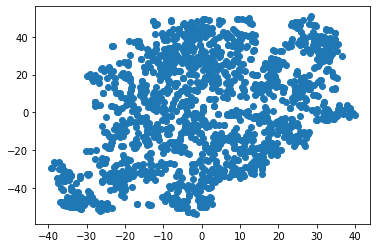

In [27]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])

# for i, label in enumerate(pts):
#     plt.annotate(label, (X_embedded[i,0], X_embedded[i,1]))




In [ ]:
# R = np.random.randint(low=0, high=2, size=(N,N)).astype(np.bool8)
# TP = np.sum(mask * R)
# TN = np.sum(~mask * R)
# (TP+TN)/(N*(N))

In [ ]:
# d = 0.5
# p_same_idx = np.triu_indices(7, k = 1)
# N = p_same_idx[0].shape[0]
# np.sum(K[:7,:7][p_same_idx] < d)/N

In [ ]:
# N = categories.shape[0]
# Z = np.zeros((N, N, 3), dtype=np.int32)
# X, Y = np.meshgrid(np.arange(N), np.arange(N))
# Z[:,:,0] = Y
# Z[:,:,1] = X
# Z[:,:, 2] = mask
# ix, iy = np.triu_indices(N, k = 1)

# tr_u = Z[ix, iy, :]

# same_idx = tr_u[tr_u[:,2]==1, :2]
# diff_idx = tr_u[tr_u[:,2]==0, :2]

In [ ]:
# same_idx

In [ ]:
# TA = K[same_idx[:,0], same_idx[:,1]] < d

# VAL = np.sum(TA)/TA.shape[0]
# VAL

In [ ]:
# np.sum(TA), TA.shape[0]

In [ ]:
# FA = K[diff_idx[:,0], diff_idx[:,1]] <= d

# FAR = np.sum(FA)/FA.shape[0]
# FAR

In [ ]:
# np.sum(FA), FA.shape